In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('./data/bluenile_eda_new_features.csv')
print(df.shape)

(52372, 17)


# MULTIPLE LINEAR REGRESSION

In [3]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn import metrics
import scipy.stats as stats

In [4]:
df.columns

Index(['Carat Weight', 'Color', 'Clarity', 'Cut', 'Depth %', 'Table %',
       'Polish', 'Symmetry', 'Length to Width', 'Culet', 'Fluorescence',
       'Price', 'FourC', 'DT Ratio', 'Carat Color', 'Carat Clarity', 'Shine'],
      dtype='object')

In [5]:
# original multifeature columns
omfc = ['Carat Weight', 'Color', 'Clarity', 'Cut', 'Depth %', 'Table %',
       'Polish', 'Symmetry', 'Length to Width', 'Culet',
       'Fluorescence']

In [6]:
X = df[omfc]
y = df.Price

In [7]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20, random_state=11)
X_tr, X_val, y_tr, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=11)

In [8]:
# mfc
lr = LinearRegression()
lr.fit(X_tr,y_tr)

LinearRegression()

In [9]:
# predict on training set
yhat_tr = lr.predict(X_tr)

# predict on val set
yhat_val = lr.predict(X_val)

In [10]:
print('Simple Training RSQ:',metrics.r2_score(y_tr, yhat_tr))
print('Simple Val RSQ:',metrics.r2_score(y_val, yhat_val))
simp_mult_val_r2 = metrics.r2_score(y_val, yhat_val)

print('\nSimple Training RMAE:',np.sqrt(metrics.mean_squared_error(y_tr, yhat_tr)))
print('Simple Val RMAE:',np.sqrt(metrics.mean_squared_error(y_val, yhat_val)))
simp_val_rmae = np.sqrt(metrics.mean_squared_error(y_val, yhat_val))

Simple Training RSQ: 0.8777311973122378
Simple Val RSQ: 0.8776300423111233

Simple Training RMAE: 957.3776274721547
Simple Val RMAE: 956.9371483210803


In [11]:
# multifeature columns
mfc = ['Carat Weight', 'Color', 'Clarity', 'Cut', 'Depth %', 'Table %',
       'Polish', 'Symmetry', 'Length to Width', 'Culet',
       'Fluorescence', 'FourC', 'DT Ratio', 'Carat Color',
       'Carat Clarity', 'Shine']

X_ = df[mfc]
y = df.Price

In [12]:
# multifeature columns
X_train_val, X_test, y_train_val, y_test = train_test_split(X_, y, test_size=0.20, random_state=11)

In [13]:
# mfc
X_tr, X_val, y_tr, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=11)

In [14]:
# mfc
lr = LinearRegression()
lr.fit(X_tr,y_tr)

LinearRegression()

In [15]:
# predict on training set
yhat_tr = lr.predict(X_tr)

# predict on val set
yhat_val = lr.predict(X_val)

In [16]:
print('Simple Val RSQ:',simp_mult_val_r2)
print('\nMuliple Training RSQ:',metrics.r2_score(y_tr, yhat_tr))
print('Multiple Val RSQ:',metrics.r2_score(y_val, yhat_val))
mult_val_r2 = metrics.r2_score(y_val, yhat_val)

print('\nSimple Val RMAE:',simp_val_rmae)
print('\nMultiple Training RMAE:',np.sqrt(metrics.mean_squared_error(y_tr, yhat_tr)))
print('Multiple Val RMAE:',np.sqrt(metrics.mean_squared_error(y_val, yhat_val)))
mult_val_rmae = np.sqrt(metrics.mean_squared_error(y_val, yhat_val))

Simple Val RSQ: 0.8776300423111233

Muliple Training RSQ: 0.8920765125195065
Multiple Val RSQ: 0.8923477910515324

Simple Val RMAE: 956.9371483210803

Multiple Training RMAE: 899.4632632073195
Multiple Val RMAE: 897.5475837892332


### Residuals

In [17]:
val_res = y_val - yhat_val

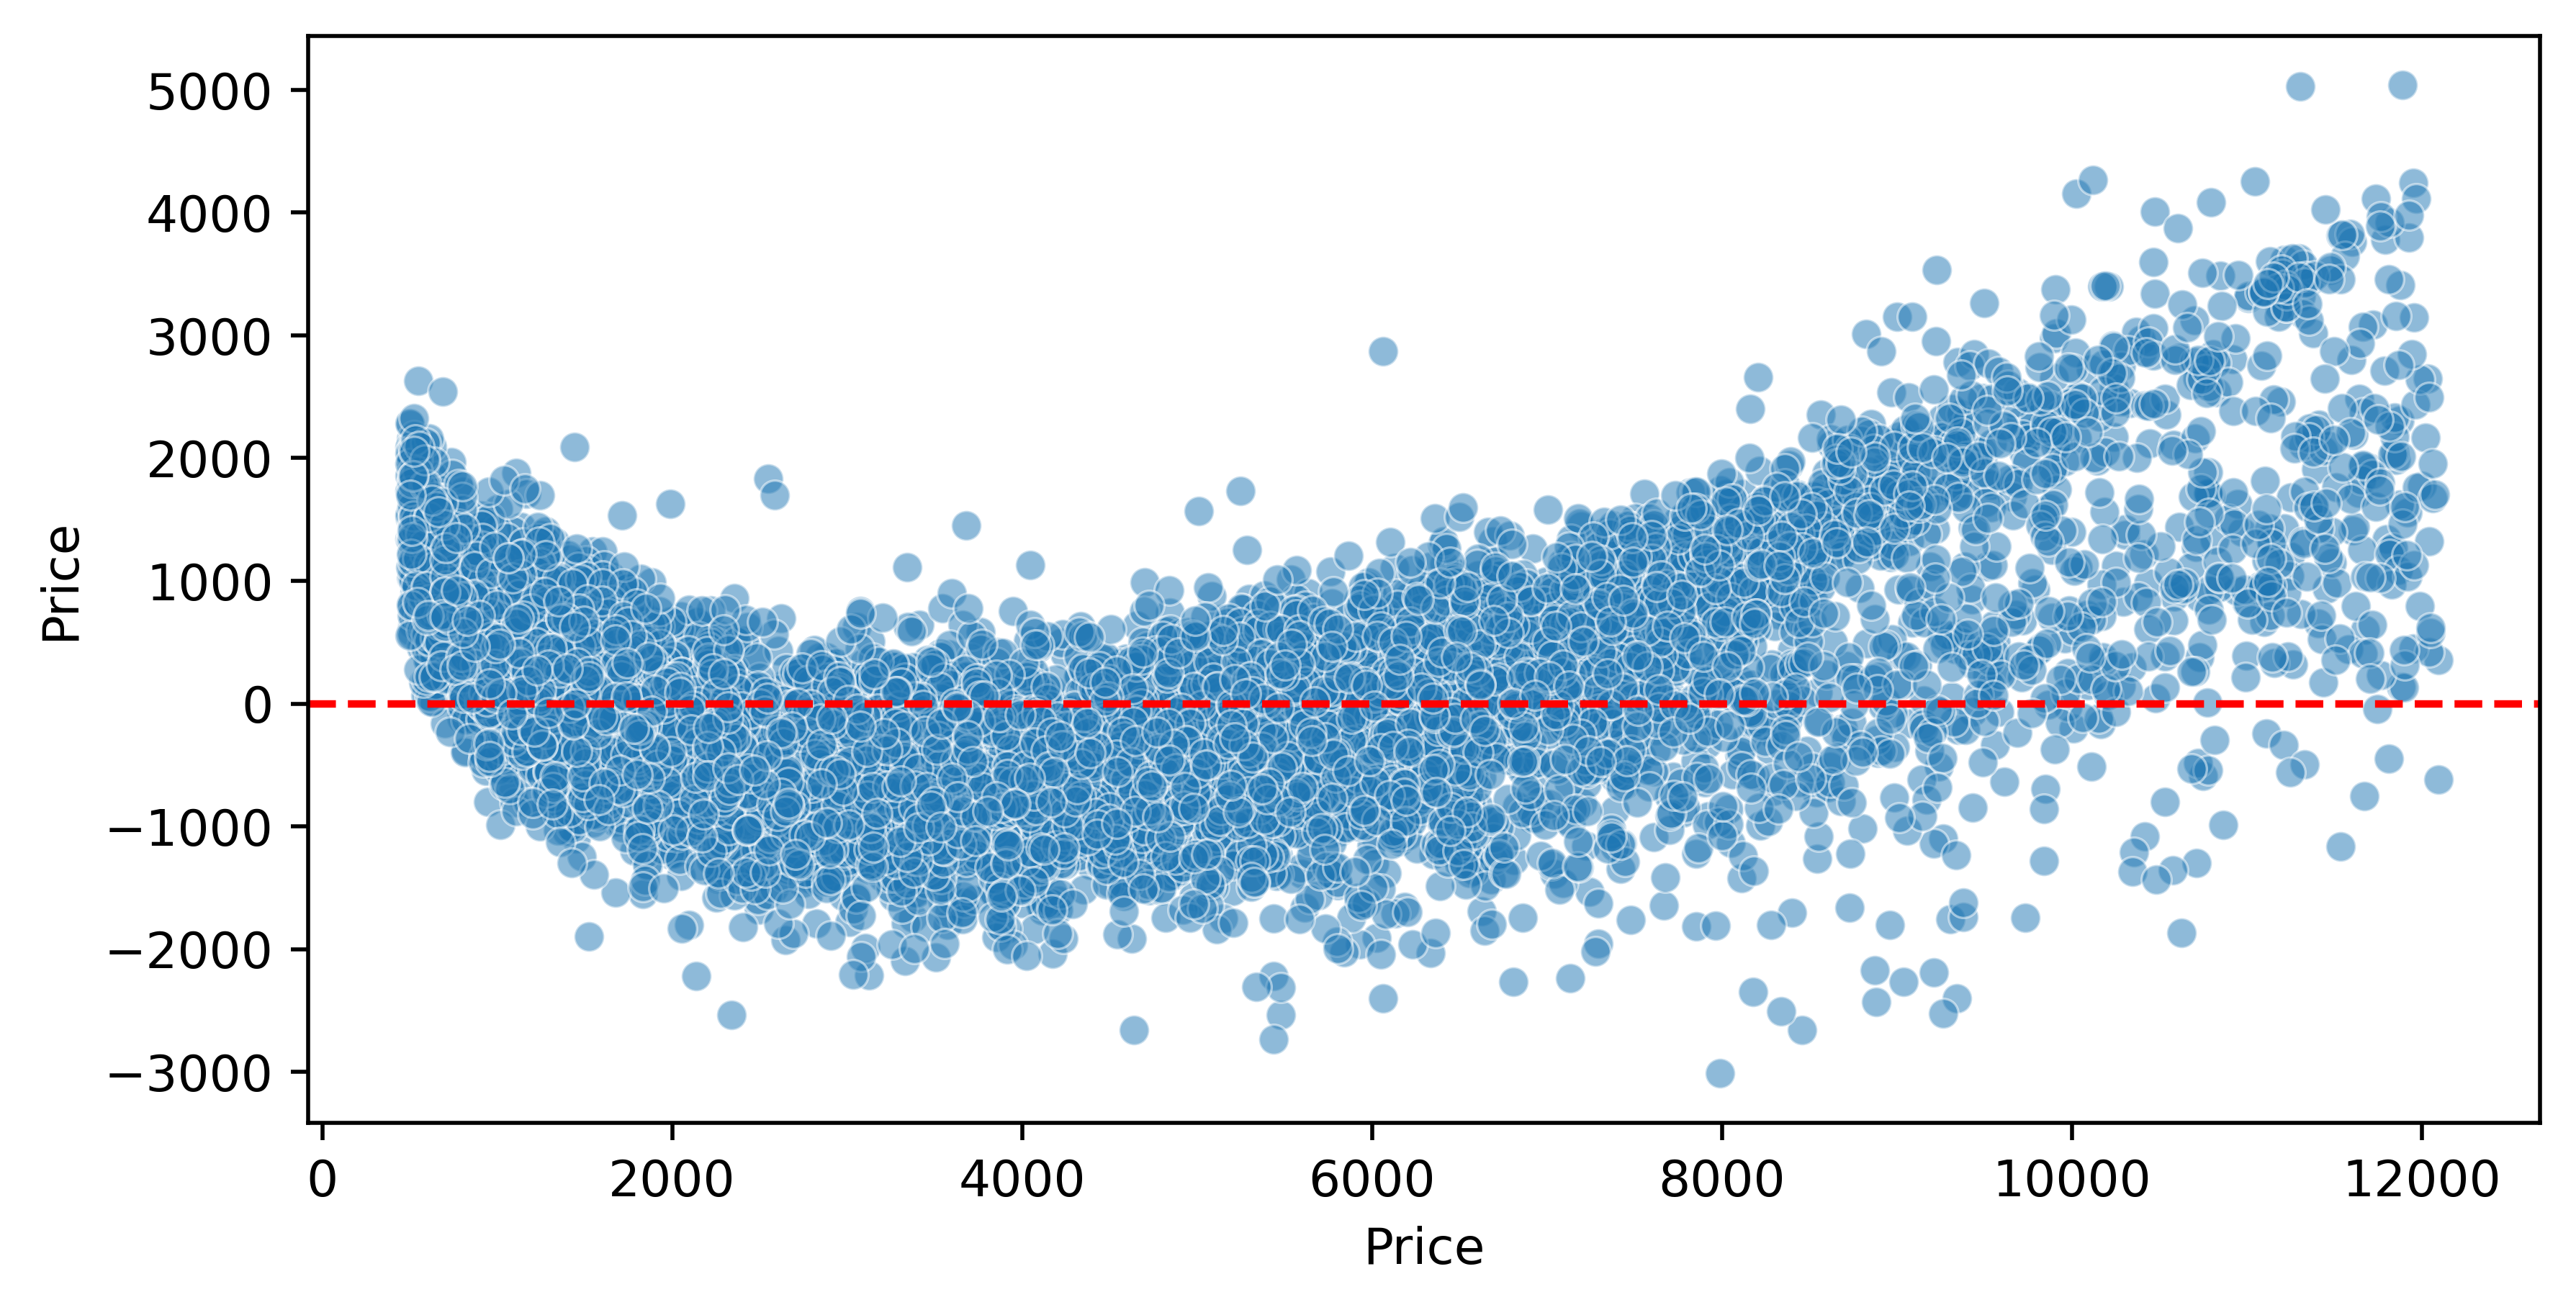

In [18]:
fig = plt.figure(figsize=(8,4),dpi=500)
sns.scatterplot(x=y_val,y=val_res,alpha=.5)
plt.axhline(y=0,color='r',ls='--')

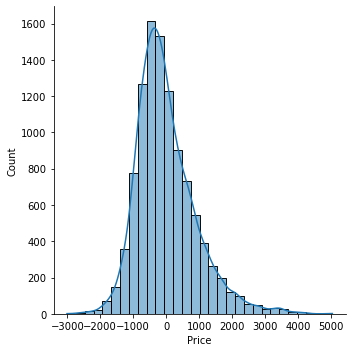

In [19]:
sns.displot(val_res,bins=30,kde=True)

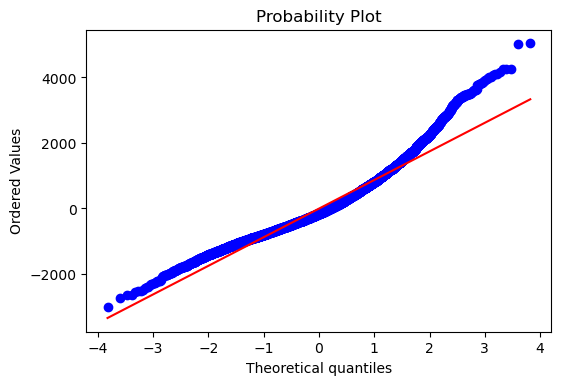

In [20]:
fig,ax = plt.subplots(figsize=(6,4),dpi=100)
_ = stats.probplot(val_res,plot=ax)

# Polynomial Regression

In [21]:
train_r2 = []
val_r2 = []
for d in range(1,4):
    poly_convert = PolynomialFeatures(degree=d,include_bias=False)
    poly_feat = poly_convert.fit_transform(X_)
    
    X_train_val, X_test, y_train_val, y_test = train_test_split(poly_feat, y, test_size=0.20, random_state=11)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=11)
    
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    yhat_train = model.predict(X_train)
    yhat_val = model.predict(X_val)
    
    train_r2_score = metrics.r2_score(y_train,yhat_train)
    val_r2_score = metrics.r2_score(y_val,yhat_val)
    
    train_r2.append(train_r2_score)
    val_r2.append(val_r2_score)
    
print ('Training R2:', train_r2, '\nVal R2:', val_r2)

Training R2: [0.8920765125195065, 0.9596446034343532, 0.9701542142929989] 
Val R2: [0.8923477910515454, 0.9594915857538897, 0.9497701318913487]


In [22]:
poly_convert = PolynomialFeatures(degree=2,include_bias=False)
poly_feat = poly_convert.fit_transform(X_)
    
X_train_val, X_test, y_train_val, y_test = train_test_split(poly_feat, y, test_size=0.20, random_state=11)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=11)
    
poly_model = LinearRegression()
poly_model.fit(X_train,y_train)
    
poly_yhat_train = poly_model.predict(X_train)
poly_yhat_val = poly_model.predict(X_val)
    
poly_train_r2 = metrics.r2_score(y_train,poly_yhat_train)
poly_val_r2 = metrics.r2_score(y_val,poly_yhat_val)

print('Original R2:',mult_val_r2)
print('Poly Train:',poly_train_r2)
print('Poly Validate:',poly_val_r2)

Original R2: 0.8923477910515324
Poly Train: 0.9596446034343532
Poly Validate: 0.9594915857538897


In [23]:
print('Poly Training Predictions RMAE:',np.sqrt(metrics.mean_squared_error(y_train, poly_yhat_train)))
print('Poly Val Predictions RMAE:',np.sqrt(metrics.mean_squared_error(y_val, poly_yhat_val)))

Poly Training Predictions RMAE: 550.0171791932974
Poly Val Predictions RMAE: 550.577716889106


# Scaling

In [24]:
# X_train: poly X matrix
# X_val: poly X matrix
# X_test: poly X matrix
# y_train: y vector
# y_val: y vector
# y_test: y vector

In [25]:
sts = StandardScaler()
sts.fit(X_train)

StandardScaler()

In [26]:
X_train_scale = sts.transform(X_train)
X_val_scale = sts.transform(X_val)
X_test_scale = sts.transform(X_test)

In [27]:
# X_train: poly X matrix
# X_train_scale: poly X matrix, scaled
# X_val: poly X matrix
# X_val_scale: poly X matrix, scaled
# X_test: poly X matrix
# X_test_scale: poly X matrix, scaled

# y_train: y vector
# y_val: y vector
# y_test: y vector

In [28]:
type(X_train), type(X_train_scale)

(numpy.ndarray, numpy.ndarray)

(array([1488., 1066., 1012.,  582.,  608.,  347.,  507.,  219.,  337.,
         199.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

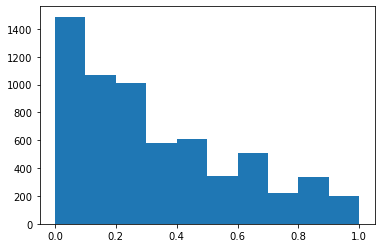

In [29]:
plt.hist(X_train_scale[:,150],range=(0,1))

# LASSO REGRESSION

In [ ]:
alphavec = 10**np.linspace(-1,1,200)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_train_scale, y_train)
lasso_model.alpha_

/Users/lescardone/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59785234.83936691, tolerance: 18925551.12604755
  model = cd_fast.enet_coordinate_descent_gram(
/Users/lescardone/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22599178.17753029, tolerance: 18925551.12604755
  model = cd_fast.enet_coordinate_descent_gram(
/Users/lescardone/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23340697.272686005, tolerance: 18925551.12604755
  model = cd_fast.enet_coordinate_descent_gram(
/Users/le

In [ ]:
lasso = Lasso(alpha = .1)
lasso.fit(X_train_scale,y_train)
lasso_yhat_train = lasso.predict(X_train_scale)
lasso_yhat_val = lasso.predict(X_val_scale)

In [ ]:
poly_feature_labels = poly_convert.get_feature_names()
original_labels = ['Carat Weight', 'Color', 'Clarity', 'Cut', 
                   'Depth %', 'Table %','Polish', 'Symmetry',
                   'Cut Grade', 'Length to Width', 'Culet','Fluorescence',
                   'FourC', 'DT Ratio', 'Carat Color','Carat Clarity',
                   'Shine',
                   'Carat Weight SQ',
                   'Carat Weight X Color', 'Carat Weight X Clarity','Carat Weight X Cut',
                   'Carat Weight X Depth %', 'Carat Weight X Table %', 'Carat Weight X Polish','Carat Weight X Symmetry',
                   'Carat Weight X Cut Grade,','Carat Weight X LtW','Carat Weight X Culet','Carat Weight X Fluorescence',
                   'Carat Weight X FourC','Carat X DT Ratio','Carat Weight X Carat Color', 'Carat Weight X Carat Clarity',
                   'Carat Weight X Shine',
                   'Color SQ', 
                   'Color X Clarity','Color X Cut',
                   'Color X Depth %','Color X Table %','Color X Polish','Color X Symmetry',
                   'Color X Cut Grade','Color X LtW','Color X Culet','Color X Fluoresence',
                   'Color X FourC','Color X DT Ratio','Color Weight X Carat Color','Color Weight X Carat Clarity',
                   'Color X Shine',
                   'Clarity SQ',
                   'Clarity X Cut',
                   'Clarity X Depth %','Clarity X Table %','Clarity X Polish','Clarity X Symmetry',
                   'Clarity X Cut Grade','Clarity X LtW','Clarity X Culet','Clarity X Fluorescence',
                   'Clarity X FourC','Clarity X DT Ratio','Clarity X Carat Color','Clarity X Carat Clarity',
                   'Clarity X Shine',
                   'Cut SQ',
                   'Cut X Depth %','Cut X Table %','Cut X Polish','Cut X Symmetry',
                   'Cut X Cut Grade','Cut X LtW','Cut X Culet','Cut X Fluorescence',
                   'Cut X FourC','Cut X DT Ratio','Cut X Carat Color','Cut X Carat Clarity',
                   'Cut X Shine',
                   'Depth % SQ',
                   'Depth X Table','Depth X Polish','Depth X Symmetry',
                   'Depth X Cut Grade', 'Depth X LtW','Depth X Culet','Depth X Fluoresence',
                   'Depth X FourC','Depth X DT Ratio','Depth X Carat Color','Depth X Carat Clarity',
                   'Depth X Shine',
                   'Table SQ',
                   'Table X Polish','Table X Symmetry',
                   'Table X Cut Grade','Table X LtW','Table X Culet','Table X Fluorescence',
                   'Table X FourC','Table X DT Ratio','Table X Carat Color','Table X Carat Clarity',
                   'Table X Shine',
                   'Polish SQ',
                   'Polish X Symmetry',
                   'Polish X Cut Grade','Polish X LtW','Polish X Culet','Polish X Fluorescence',
                   'Polish X FourC','Polish X DT Ratio','Polish X Carat Color','Polish X Carat Clarity',
                   'Polish X Shine', 
                   'Symmetry SQ',
                   'Symmetry X Cut Grade','Symmetry X LtW','Symmetry X Culet','Symmetry X Fluorescence',
                   'Symmetry X FourC','Symmetry X DT Ratio','Symmetry X Carat Color','Symmetry X Carat Clarity',
                   'Symmetry X Shine',
                   'Cut Grade SQ',
                   'Cut Grade X LtW','Cut Grade X Culet','Cut Grade X Fluorescence',
                   'Cut Grade X FourC','Cut Grade X DT Ratio','Cut Grade X Carat Color','Cut Grade X Carat Clarity',
                   'Cut Grade X Shine',
                   'LtW SQ',
                   'Ltw X Culet','Ltw X Fluorescence',
                   'Ltw X FourC','Ltw X DT Ratio','Ltw X Carat Color','Ltw X Carat Clarity',
                   'Ltw X Shine',
                   'Culet SQ',
                   'Culet X Fluorescence',
                   'Culet X FourC','Culet X DT Ratio','Culet X Carat Color','Culet X Carat Clarity',
                   'Culet X Shine',
                   'Fluorescence SQ',
                   'Fluorescence X FourC','Fluorescence X DT Ratio','Fluorescence X Carat Color','Fluorescence X Carat Clarity',
                   'Fluorescence X Shine',
                   'FourC SQ',
                   'FourC X DT Ratio','FourC X Carat Color','FourC X Carat Clarity',
                   'FourC X Shine',
                   'DT Ratio SQ',
                   'DT Ratio X Carat Color','DT Ratio X Carat Clarity',
                   'DT Ratio X Shine',
                   'Carat Color SQ',
                   'Carat Color X Carat Clarity',
                   'Carat Color X Shine',
                   'Carat Clarity SQ',
                   'Carat Clarity X Shine',
                   'Shine SQ']
len(original_labels)
#len(poly_feature_labels)

In [ ]:
def sort_tuple(tup): 
    # reverse = None (Sorts in Ascending order) 
    # key is set to sort using second element of 
    # sublist lambda has been used 
    tup.sort(key = lambda x: x[1]) 
    return tup

In [ ]:
lasso_coef = list(zip(original_labels,lasso.coef_))
lasso_coef_sorted = sort_tuple(lasso_coef)
lasso_coef_sorted

In [ ]:
lasso_train_r2 = metrics.r2_score(y_train,lasso_yhat_train)
lasso_val_r2 = metrics.r2_score(y_val,lasso_yhat_val)
print('Original R2:',mult_val_r2,'\n')
print('Poly Train:',poly_train_r2)
print('Poly Validate:',poly_val_r2,'\n')
print('Lasso Train:',lasso_train_r2)
print('Lasso Validate:',lasso_val_r2)

In [ ]:
lasso_val_res = y_val - lasso_yhat_val

In [ ]:
fig = plt.figure(figsize=(8,4),dpi=500)
sns.scatterplot(x=y_val,y=lasso_val_res,alpha=.5)
plt.axhline(y=0,color='r',ls='--')

In [ ]:
sns.displot(lasso_val_res,bins=30,kde=True)

In [ ]:
fig,ax = plt.subplots(figsize=(6,4),dpi=100)
_ = stats.probplot(lasso_val_res,plot=ax)

In [ ]:
lasso_yhat_test = lasso.predict(X_test_scale)
lasso_test_r2 = metrics.r2_score(y_test,lasso_yhat_test)

In [ ]:
print('Original R2:',mult_val_r2,'\n')
print('Poly Train:',poly_train_r2)
print('Poly Validate:',poly_val_r2,'\n')
print('Lasso Train:',lasso_train_r2)
print('Lasso Validate:',lasso_val_r2,'\n')
print('Lasso TEST:',lasso_test_r2)

In [ ]:
print('\nSimple Val RMAE:',simp_val_rmae)
print('\nMultiple Training RMAE:',np.sqrt(metrics.mean_squared_error(y_tr, yhat_tr)))
print('Multiple Val RMAE:',mult_val_rmae)
print('\nPoly Training RMAE:',np.sqrt(metrics.mean_squared_error(y_train, poly_yhat_train)))
print('Poly Val RMAE:',np.sqrt(metrics.mean_squared_error(y_val, poly_yhat_val)))
print('\nLasso Train RMAE:',np.sqrt(metrics.mean_squared_error(y_train,lasso_yhat_train)))
print('Lasso Val RMAE:',np.sqrt(metrics.mean_squared_error(y_val,lasso_yhat_val)))
print('\nLasso TEST RMAE:',np.sqrt(metrics.mean_squared_error(y_test,lasso_yhat_test)))